Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/mall-customers/Mall_Customers.csv


Import dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Creating array with **Annual Income** and **Spending Score**

In [3]:
X = dataset.iloc[: , [3, 4]].values

Plotting Dendrogram

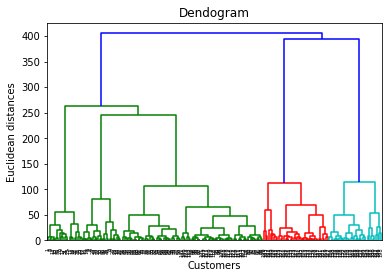

In [4]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Here we can see that the longest vertical line which is not cut by any horizontal line (extended) is 3rd green line from left (~100 to 250).

So, the optimal number of clusters is **5**

In [5]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

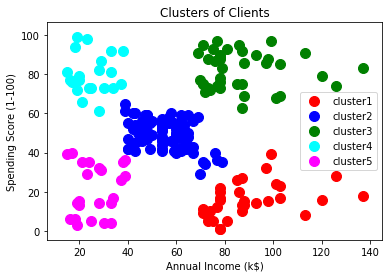

In [6]:
plt.scatter(X[y_hc ==  0, 0], X[y_hc ==  0, 1], s = 100, c = 'red', label = 'cluster1')
plt.scatter(X[y_hc ==  1, 0], X[y_hc ==  1, 1], s = 100, c = 'blue', label = 'cluster2')
plt.scatter(X[y_hc ==  2, 0], X[y_hc ==  2, 1], s = 100, c = 'green', label = 'cluster3')
plt.scatter(X[y_hc ==  3, 0], X[y_hc ==  3, 1], s = 100, c = 'cyan', label = 'cluster4')
plt.scatter(X[y_hc ==  4, 0], X[y_hc ==  4, 1], s = 100, c = 'magenta', label = 'cluster5')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Here,

**y_kmeans ==  0** is value of y_kmeans for cluster 0

**X[y_kmeans ==  0]** is X for cluster 0

**X[y_kmeans ==  0, 0]** first item of the X for cluster 0



Now, we will change the labels of our clusters to match with the insights we got from it

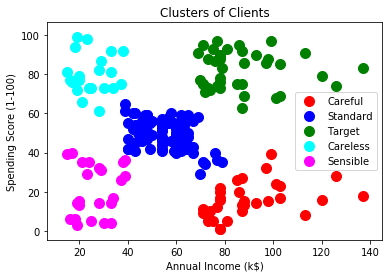

In [7]:
plt.scatter(X[y_hc ==  0, 0], X[y_hc ==  0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc ==  1, 0], X[y_hc ==  1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc ==  2, 0], X[y_hc ==  2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc ==  3, 0], X[y_hc ==  3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc ==  4, 0], X[y_hc ==  4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

So, **target** is the cluster we might be interested in for our products. This Cluster is our potential market segment since customers in this segment have high income and they also spend more